### Step 1. 필요한 라이브러리 임포트

In [2]:
import pandas as pd

### Step 2. [데이터](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv) 확인

### Step 3. 데이터 불러오기


**read_csv를 통해 데이터를 올바른 형태로 불러온 뒤 drinks 저장해주세요**  
data : drinks.csv

In [3]:
drinks = pd.read_csv('../pandas/drinks.csv')

In [309]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [312]:
print(type(drinks))

<class 'pandas.core.frame.DataFrame'>


### Step 4. 어느 대륙(continent)이 평균 맥주 소모량이 가장 높은가요?

EU

In [313]:
drinks_continent_mean = drinks.groupby('continent')['beer_servings'].mean()

In [314]:
drinks_continent_mean[drinks_continent_mean == drinks_continent_mean.max()].index[0]

'EU'

### Step 5. 각 대륙(continent)별 와인 소모 통계값 계산해주세요

count, mean,std, min, max값은 'describe'를 통해 한번에 조회할 수 있습니다

groupby후 describe를 적용해보세요

In [315]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,35.0,37.514286,58.231471,1.0,4.0,11.0,40.50,221.0


### Step 6. 평균 알코올 소비량을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 평균값을 구해주세요

In [316]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,155.600000,148.257143,37.514286,6.102857


### Step 7. 알코올 소비량 중간값을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 중간값을 구해주세요

중간값은 .median()으로 구합니다

In [317]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,159.0,124.0,11.0,6.30


### Step 8. 증류주(spirit) 소비량의 평균, 최소, 최대값을 구해주세요

Hint: groupby와 agg 함수를 사용하여 한번에 표현해주세요

In [318]:
drinks.groupby('continent')['spirit_servings'].agg([min,max,'mean'])

,min,max,mean
continent,,,
AF,0,152,16.339623
AS,0,326,60.840909
EU,0,373,132.555556
OC,0,254,58.437500
SA,25,438,148.257143


### Step 9. 대륙별 맥주 소비량의 평균을 Bar 그래프로 표현해주세요

In [319]:
import matplotlib.pyplot as plt

In [320]:
import numpy as np

In [321]:
dr_cont=drinks.groupby('continent').beer_servings.mean()

In [322]:
dr_df=pd.DataFrame(dr_cont)

In [323]:
dr_df

,beer_servings
continent,
AF,61.471698
AS,37.045455
EU,193.777778
OC,89.687500
SA,155.600000


In [324]:
 type(dr_df)

pandas.core.frame.DataFrame

In [325]:
plt.rc('font', family = 'Malgun Gothic')

In [326]:
plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

Text(0, 0.5, '맥주소비량')

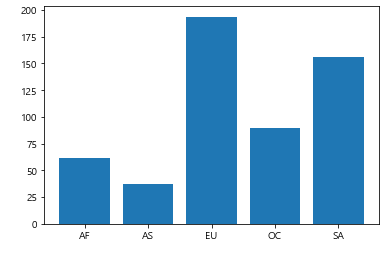

In [327]:
plt.bar(dr_df.index,dr_df['beer_servings'])
plt.xlabel('대륙별',color='w')
plt.ylabel('맥주소비량',color='w')

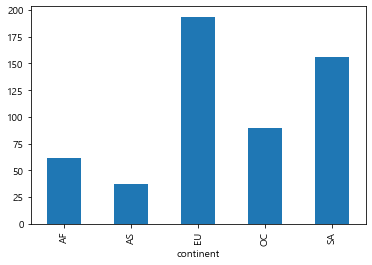

In [328]:
dr_cont=drinks.groupby('continent').beer_servings.mean().plot.bar()

In [329]:
drinks.count()

country                         193
beer_servings                   193
spirit_servings                 193
wine_servings                   193
total_litres_of_pure_alcohol    193
continent                       193
dtype: int64

In [330]:
drinks[drinks['continent'].isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


In [331]:
drinks.fillna('SA', inplace=True)

In [332]:
drinks.count()

country                         193
beer_servings                   193
spirit_servings                 193
wine_servings                   193
total_litres_of_pure_alcohol    193
continent                       193
dtype: int64